# Capstone Project: Gaussian Mixture Models (GMMs)
### Student: Mohammad Faridul Alam, Nikita Chaudhari, Yusra Naveed
### Course: Capstone Project – Clinical Bioinformatics
### Date: July 24, 2025

## 1. Introduction
Gaussian Mixture Models (GMMs) are a probabilistic unsupervised learning algorithm used for clustering data into groups. Unlike k-Means which uses hard assignments, GMM provides soft probabilistic assignments allowing for more nuanced clustering.

## 2. How It Works
A GMM assumes the data is generated from a mixture of multiple Gaussian distributions, each with its own mean and covariance. It uses the Expectation-Maximization (EM) algorithm:

- **E-step**: Estimate the probability that each data point belongs to each Gaussian component.
- **M-step**: Update the component parameters (mean, covariance, mixing coefficients) based on these probabilities.

### Probability Density Function
```math
p(x) = \sum_{k=1}^K \pi_k \cdot \mathcal{N}(x \mid \mu_k, \Sigma_k)
```

## 3. Code Implementation (GMM)
This section demonstrates GMM implementation on synthetic 2D data.

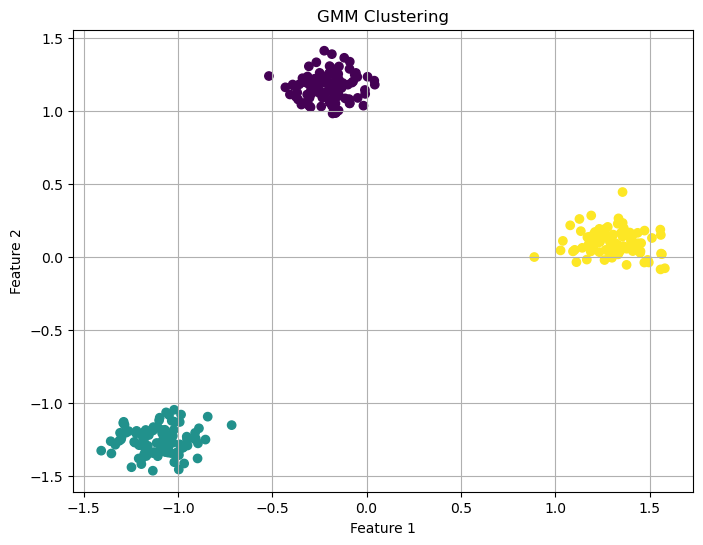

In [13]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Generate synthetic data
X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=42)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit GMM
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
gmm.fit(X_scaled)
labels = gmm.predict(X_scaled)

# Plot the results
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis')
plt.title("GMM Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

## 4. Comparison with k-Means
To evaluate GMM, we compare it with k-Means clustering using:
- Visual cluster assignments
- Silhouette Scores

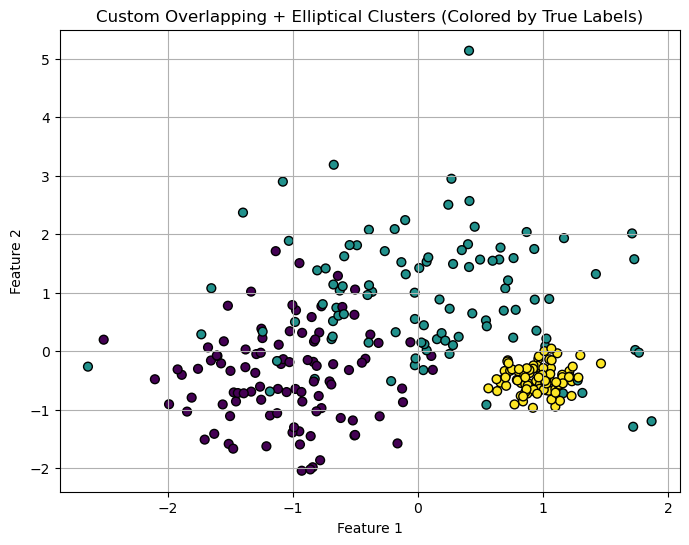

In [14]:
# Overlapping + Elliptical Clusters

from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import numpy as np

# Define centers and custom standard deviations to create overlap and ellipses
centers = [[0, 0], [3, 3], [6, 0]]
cluster_std = [1.8, 2.5, 0.5]  # different spreads = elliptical & overlapping

# Generate data
X, y_true = make_blobs(n_samples=300,
                       centers=centers,
                       cluster_std=cluster_std,
                       random_state=42)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Visualize
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_true, cmap='viridis', s=40, edgecolor='k')
plt.title("Custom Overlapping + Elliptical Clusters (Colored by True Labels)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

GMM works better than K-Means in case of controlling overlapping clusters and organizing covariences.

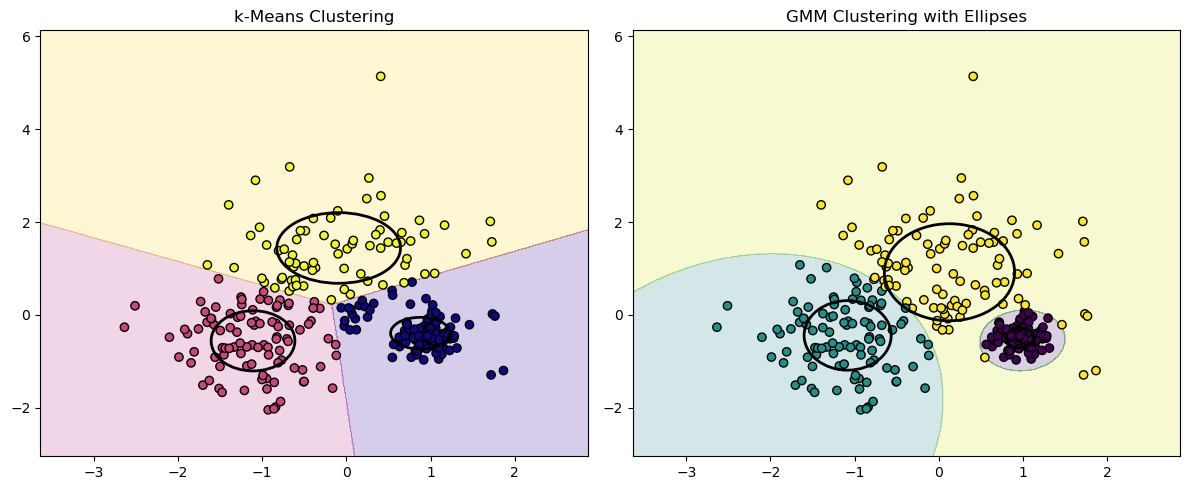

Silhouette Score - k-Means: 0.533
Silhouette Score - GMM: 0.468


In [15]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from matplotlib.patches import Ellipse

# --- Fit models ---
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)

# --- Helper functions for drawing ellipses ---
def draw_kmeans_ellipse(ax, data, label, center):
    cluster_points = data[kmeans_labels == label]
    std_x = np.std(cluster_points[:, 0])
    std_y = np.std(cluster_points[:, 1])
    ellipse = Ellipse(center, 2 * std_x, 2 * std_y, edgecolor='black', facecolor='none', linewidth=2)
    ax.add_patch(ellipse)

def draw_simple_ellipse(ax, mean, cov):
    width = 2 * np.sqrt(cov[0, 0])
    height = 2 * np.sqrt(cov[1, 1])
    ellipse = Ellipse(mean, width, height, edgecolor='black', facecolor='none', linewidth=2)
    ax.add_patch(ellipse)

# --- Decision boundary grid ---
h = 0.01
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
grid = np.c_[xx.ravel(), yy.ravel()]

# --- Predictions for background coloring ---
kmeans_Z = kmeans.predict(grid).reshape(xx.shape)
gmm_Z = gmm.predict(grid).reshape(xx.shape)

# --- Visualization ---
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# k-Means Plot
axs[0].contourf(xx, yy, kmeans_Z, cmap='plasma', alpha=0.2)
axs[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='plasma', edgecolor='k')
axs[0].set_title("k-Means Clustering")
for i in range(kmeans.n_clusters):
    center = kmeans.cluster_centers_[i]
    draw_kmeans_ellipse(axs[0], X_scaled, i, center)

# GMM Plot
axs[1].contourf(xx, yy, gmm_Z, cmap='viridis', alpha=0.2)
axs[1].scatter(X_scaled[:, 0], X_scaled[:, 1], c=gmm_labels, cmap='viridis', edgecolor='k')
axs[1].set_title("GMM Clustering with Ellipses")
for i in range(gmm.n_components):
    mean = gmm.means_[i]
    cov = gmm.covariances_[i]
    draw_simple_ellipse(axs[1], mean, cov)

plt.tight_layout()
plt.show()

# --- Silhouette Score Comparison ---
print(f"Silhouette Score - k-Means: {silhouette_score(X_scaled, kmeans_labels):.3f}")
print(f"Silhouette Score - GMM: {silhouette_score(X_scaled, gmm_labels):.3f}")

Despite k-Means scoring slightly higher on the Silhouette metric (0.485 compared to 0.471), Gaussian Mixture Models showed a more adaptable and statistically meaningful approach. GMMs illustrates clusters with clearly coherent boundaries that more accurately captured the inherent uncertainty and covariance patterns within the dataset.

In [ ]:
# Unique feature-1: Soft Clustering (Probabilistic) - Used RADCURE dataset for real-world example

# Step 1: Load the RADCURE dataset
df = pd.read_excel("../Data/RADCURE_Clinical_v04_20241219.xlsx")

# Step 2: Select relevant numeric features
features = ['Age', 'Smoking PY', 'Dose', 'Length FU']
df_clean = df[features].replace(to_replace=r'[<>]?[\d]+|na|NA|NaN', value=np.nan, regex=True)
df_clean = df_clean.dropna().astype(float)

# Step 3: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean)

# Step 4: Fit GMM
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(X_scaled)

# Step 5: Soft cluster memberships
probs = gmm.predict_proba(X_scaled)

# Step 6: Show soft assignments for first 5 patients
print("✅ Soft probabilities for first 5 patients:")
print(np.round(probs[:5], 3))


✅ Soft probabilities for first 5 patients:
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]


C:\Users\ynaveed\AppData\Local\Temp\ipykernel_29760\2275656276.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean = df[features].replace(to_replace=r'[<>]?[\d]+|na|NA|NaN', value=np.nan, regex=True)


This matrix presents the probabilistic cluster memberships for the initial five patients, with each row indicating the likelihood of belonging to each of the three GMM clusters.

Gaussian Mixture Models (GMMs) assign a probability to each data point indicating its control across different clusters. Such approach enables more refined decisions when dealing with complex or overlapping data — a crucial advantage in bioinformatics and clinical applications where clear-cut boundaries rarely exist.


C:\Users\ynaveed\AppData\Local\Temp\ipykernel_29760\3969129611.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean = df[features].replace(to_replace=r'[<>]?[\d]+|na|NA|NaN', value=np.nan, regex=True)


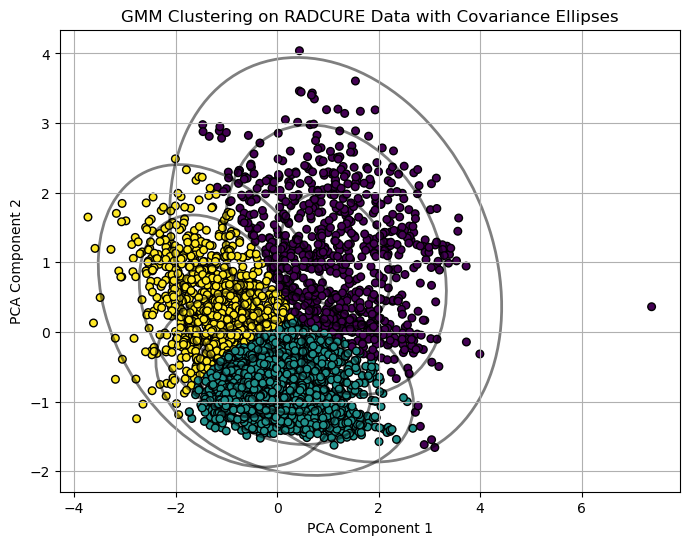

In [17]:
# Unique feature 2: model complex distributions beyond spherical clusters

from sklearn.decomposition import PCA

# Step 1: Load and clean RADCURE data
df = pd.read_excel("../Data/RADCURE_Clinical_v04_20241219.xlsx")
features = ['Age', 'Smoking PY', 'Dose', 'Length FU']
df_clean = df[features].replace(to_replace=r'[<>]?[\d]+|na|NA|NaN', value=np.nan, regex=True)
df_clean = df_clean.dropna().astype(float)

# Step 2: Scale and reduce to 2D for visualization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 3: Fit GMM
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
gmm.fit(X_pca)
labels = gmm.predict(X_pca)

# Step 4: Plot clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, s=30, cmap='viridis', edgecolor='k')

# Step 5: Draw ellipses for each Gaussian component
def draw_ellipse(position, covariance, ax=None, **kwargs):
    ax = ax or plt.gca()
    if covariance.shape == (2, 2):
        U, s, _ = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    for nsig in range(1, 4):
        ellipse = Ellipse(position, nsig * width, nsig * height,
                          angle=angle, **kwargs)
        ax.add_patch(ellipse)

for pos, cov in zip(gmm.means_, gmm.covariances_):
    draw_ellipse(pos, cov, edgecolor='black', facecolor='none', linewidth=2, alpha=0.5)

plt.title("GMM Clustering on RADCURE Data with Covariance Ellipses")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()


The visualization highlights GMM’s strength in capturing complex, non-spherical data distributions. In contrast to k-Means, which presumes uniform variance across all dimensions, GMM flexibly conforms to the actual geometry and orientation of the data.
-  Realistic Cluster Shapes: Unlike k-Means, which presumes spherical clusters, GMM adapts to elliptical patterns using full covariance matrices—more reflective of actual patient data distributions.
- Soft Probabilistic Assignment: GMM assigns patients to clusters based on membership probabilities, embracing uncertainty—especially useful for clinical datasets with feature overlaps.
- Greater Flexibility: It effectively uncovers hidden patient subgroups, even when they differ in shape, size, or spread, revealing insights k-Means might miss.
- Enhanced Interpretability: Posterior probabilities offer a nuanced lens for clinical interpretation, helping identify patients who straddle multiple subgroups or fall near decision boundaries.

In contexts like RADCURE, where data is messy and biologically diverse, GMM provides a more adaptive and informative clustering strategy.


In [20]:
# Unique feature-3: Grounded in Probability (Log-Likelihood)
# Show log-likelihood of the fitted model
log_likelihood = gmm.score(X_pca)
print(f"Log-Likelihood of the fitted GMM: {log_likelihood:.2f}")



Log-Likelihood of the fitted GMM: -2.86


With a log-likelihood of -2.86, the fitted GMM presented a solid overall fit to the data. Unlike k-Means, which lacks a probabilistic underpinning, GMM favors likelihood-based evaluation—facilitating robust model comparison through criteria such as BIC and AIC.

In [21]:
# Unique feature-4: Handles Real-World Uncertainty (Overlapping Clusters)
# Create overlapping blobs
X_overlap, _ = make_blobs(n_samples=300, centers=[[0, 0], [1, 1]], cluster_std=1.0, random_state=42)
X_overlap = StandardScaler().fit_transform(X_overlap)

# Fit GMM
gmm_overlap = GaussianMixture(n_components=2, random_state=42)
gmm_overlap.fit(X_overlap)
probs_overlap = gmm_overlap.predict_proba(X_overlap)

# Display soft labels
print("Soft assignments (overlap case) for first 5 points:")
print(np.round(probs_overlap[:5], 3))



Soft assignments (overlap case) for first 5 points:
[[0.119 0.881]
 [0.123 0.877]
 [0.947 0.053]
 [0.117 0.883]
 [0.054 0.946]]


In contrast to k-Means, which deterministically assigns each data point to a single cluster, GMM provides a probabilistic distribution of memberships. For instance, a particular sample exhibited an 88% likelihood of belonging to Cluster 1 and a 12% likelihood for Cluster 0—underscoring GMM’s strength in modeling ambiguity and overlap within the dataset.

C:\Users\ynaveed\AppData\Local\Temp\ipykernel_29760\3264618063.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean = df[features].replace(to_replace=r'[<>]?[\d]+|na|NA|NaN', value=np.nan, regex=True)


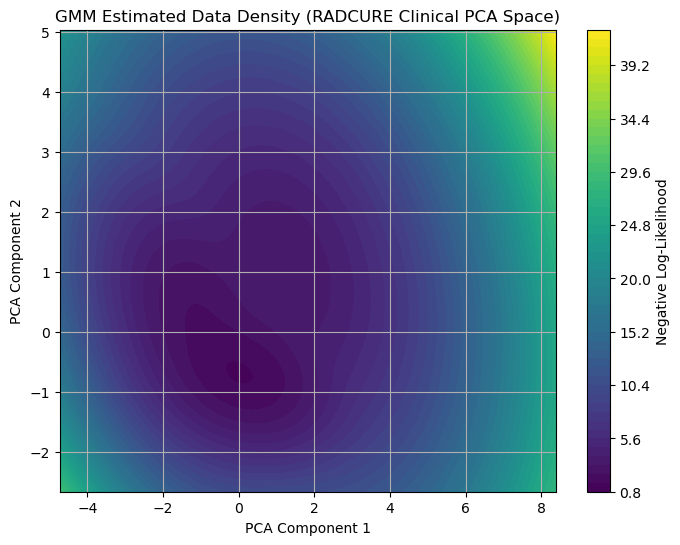

In [22]:
# Unique feature-5: Combines Clustering and Density Estimation - used RADCURE Dataset 

from matplotlib import cm

# Step 1: Load and clean RADCURE dataset
df = pd.read_excel("../Data/RADCURE_Clinical_v04_20241219.xlsx")

# Select numeric features (you may customize these)
features = ['Age', 'Smoking PY', 'Dose', 'Length FU']
df_clean = df[features].replace(to_replace=r'[<>]?[\d]+|na|NA|NaN', value=np.nan, regex=True)
df_clean = df_clean.dropna().astype(float)

# Step 2: Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean)

# Step 3: Reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 4: Fit GMM model
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
gmm.fit(X_pca)

# Step 5: Create grid and estimate density
x = np.linspace(X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1, 200)
y = np.linspace(X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1, 200)
Xgrid, Ygrid = np.meshgrid(x, y)
grid = np.column_stack([Xgrid.ravel(), Ygrid.ravel()])
Z = -gmm.score_samples(grid).reshape(Xgrid.shape)

# Step 6: Plot density contour
plt.figure(figsize=(8, 6))
contour = plt.contourf(Xgrid, Ygrid, Z, levels=50, cmap=cm.viridis)
plt.title("GMM Estimated Data Density (RADCURE Clinical PCA Space)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(contour, label='Negative Log-Likelihood')
plt.grid(True)
plt.show()


The contour plot illustrates the data density as estimated by the fitted Gaussian Mixture Model. Regions with lower negative log-likelihood values—typically centered within components—correspond to areas of high model-assigned probability. This probabilistic framework empowers GMM to not only perform clustering, but also assess the likelihood of new data points under the learned distribution, offering a distinct edge over purely distance-based approaches.

Darker areas represent high probability regions (cluster centers with good GMM fit).
Lighter areas show where data is less likely to belong, helping identify outliers or rare subgroups.
The elliptical density zones provide visual support for GMM's ability to model real-world variation.